In [17]:
#Lesson 1: https://qiskit.org/textbook/ch-states/atoms-computation.html

In [ ]:
#import qiskit files 
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
#Create a system with 3 qubits 
qc_output = QuantumCircuit(3)

In [3]:
#Add a measurement to each qubit 
qc_output.measure_all()

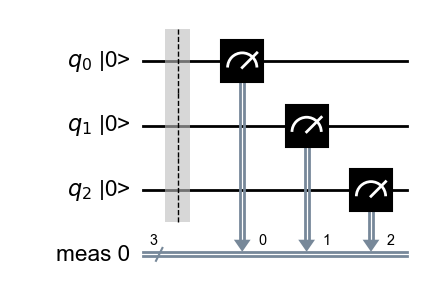

In [4]:
#Plot the system diagram
qc_output.draw(initial_state=True,output='mpl') 


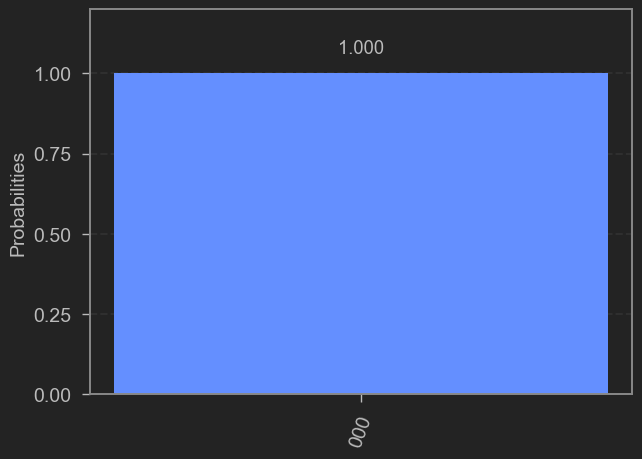

In [5]:

#Make a simulation running the system
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

#Created 000

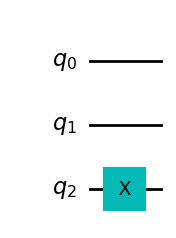

In [6]:
#Create an 3 qubit system 
qc_encode = QuantumCircuit(3)
#Create a not gate on the 3rd qubit (Flips the bit)
qc_encode.x(2)
#Draw the system
qc_encode.draw(output='mpl')


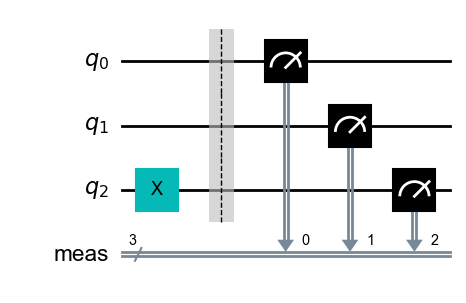

In [7]:
#Add a measurement to each qubit and draw the system
qc_encode.measure_all()
qc_encode.draw(output='mpl')

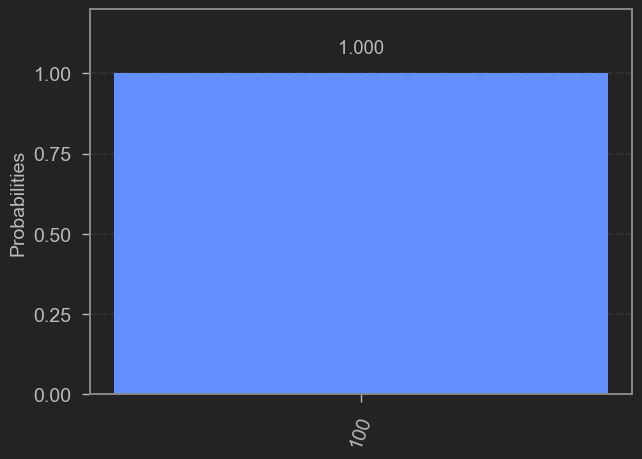

In [8]:
#Make a simulation running the system
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

#Created 100

In [9]:
#Creating an addition program in qubit 

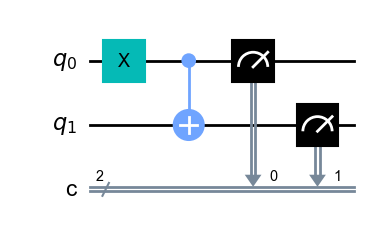

In [10]:
#Create a 2 qubit system with 2 classical bits 
qc = QuantumCircuit(2,2)
#Flips the bit on the first qubit from 0 to 1
qc.x(0)
#Apply the XOR gate from the 1st qubit to the 2nd qubit (XOR: If the 2 inputs are homogeneous, output is 0, else 1)
qc.cx(0,1)
#Add Measures to each qubit
qc.measure(0,0)
qc.measure(1,1)
#Draw the system
qc.draw(output='mpl')

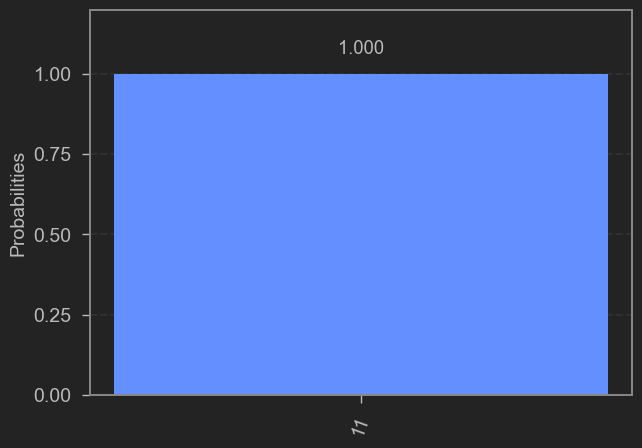

In [11]:
#Make a simulation running the system
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

#The result is 11 because the intital state was 01, since 0 DNE 1, 0 turns to 1, thus 01 -> 11

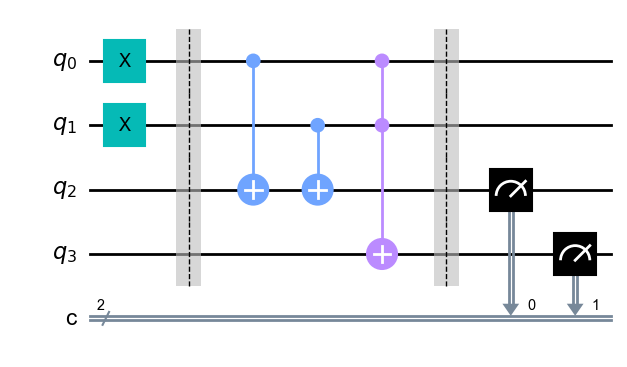

In [15]:
#Create a 4 qubit system with 2 classical bits 
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()

#We add q0 + q1 (Each q can only be 0 or 1) and apply the output on q2 and q3

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3 (AND gate: if both inputs are 1, then ouput is 1, result is 0)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

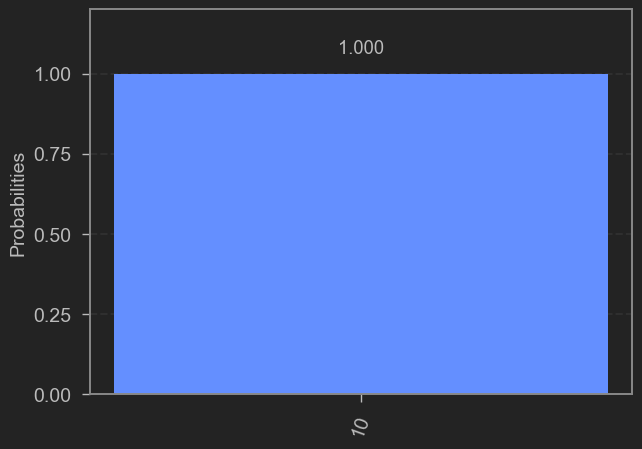

In [16]:
#Make a simulation running the system
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

#The result is 10 because the intital state was q1 = q0 = 1. 

#First two CNOT (XOR) gates
#q0=1 DNE q2=0 -> q2=1, q1=1 == q2=1 -> q2 =0

#CCX (AND) gate
#q0=1 == q1=1 == 1, q3=1

#Therefore measurement is q3q2 = 10